<a href="https://colab.research.google.com/github/trijuhari/Data_science/blob/master/Customer_Churn_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Latar Belakang**
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Setelah kemarin kita mempersiapkan data sekaligus melakukan Cleansing, maka sekarang saatnya kita untuk membuat model yang tepat untuk memprediksi churn pelanggan.



## **Tugas dan Langkah**
Pada project part 1 kemarin kita telah melakukan Cleansing Data. Sekarang, sebagai data scientist kamu diminta untuk membuat model yang tepat.

Pada tugas kali ini, kamu akan melakukan Pemodelan Machine Learning dengan menggunakan data bulan lalu, yakni Juni 2020.

### **Langkah yang akan dilakukan adalah,**

* Melakukan Exploratory Data Analysis
* Melakukan Data Pre-Processing
* Melakukan Pemodelan Machine Learning
* Menentukan Model Terbaik

## **Library yang Digunakan**
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.


```
read_csv() digunakan untuk membaca file csv
replace() digunakan untuk mengganti nilai
value_counts() digunakan untuk mengitung unik dari kolom
drop() digunakan untuk menghapus
describe() digunakan untuk melihat deskripsi datanya
value_counts() digunakan untuk mengitung unik dari kolom
Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
figure() digunakan untuk membuat figure gambar baru
subplots()digunakan untuk membuat gambar dan satu set subplot
title()digunakan untuk memberi judul pada gambar
ylabel()digunakan untuk memberi label sumbu Y pada gambar
xlabel()digunakan untuk memberi label sumbu Y pada gambar
pie()digunakan untuk membuat pie chart
Seaborn membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.
countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
heatmap() Plot rectangular data as a color-encoded matrix
Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.

LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
confusion_matrix() digunakan untuk membuat confusion matrix
classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model
Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)

XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier
Pickle mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.

dump() digunakan untuk menyimpan
```




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

## **Data yang DIgunakan**
Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv')

 
### **Untuk detil datanya adalah sebagai berikut:**

    UpdatedAt Periode of Data taken
    customerID Customer ID
    gender Whether the customer is a male or a female (Male, Female)
    SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
    Partner Whether the customer has a partner or not (Yes, No)
    tenure Number of months the customer has stayed with the company
    PhoneService Whether the customer has a phone service or not (Yes, No)
    InternetService Customer’s internet service provider (Yes, No)
    StreamingTV Whether the customer has streaming TV or not (Yes, No)
    PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
    MonthlyCharges The amount charged to the customer monthly
    TotalCharges The total amount charged to the customer
    Churn Whether the customer churned or not (Yes, No)

In [ ]:
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv')

In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [ ]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## **Data Description:**

* UpdatedAt : Periode of Data taken
* customerID : Customer ID
* gender : Whether the customer is a male or a female (Male, Female)
* SeniorCitizen : Whether the customer is a senior citizen or not (Yes, No)
* Partner :Whether the customer has a partner or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* InternetService : Customer’s internet service provider (Yes, No)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes, No)

In [ ]:
print(df_load.shape)

(6950, 13)


In [ ]:
print(df_load.customerID.nunique())

6950


# **Exploratory Data Analysis**

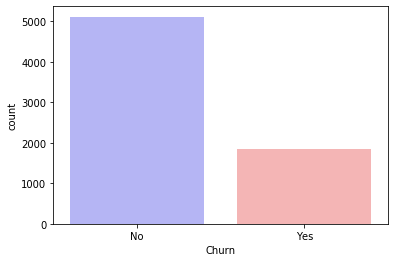

In [ ]:
sns.countplot(x= 'Churn',data = df_load, palette='bwr')
plt.show()

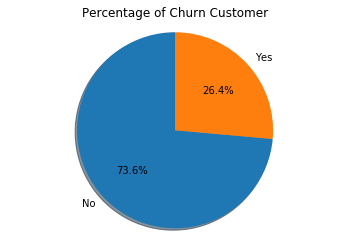

In [ ]:
#Create Churn dataframe
churn = pd.DataFrame(df_load['Churn'].value_counts())
labels = churn.index
sizes =  churn.Churn

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct="%1.1f%%", shadow= True, startangle= 90)
ax1.axis('equal')
plt.title('Percentage of Churn Customer')
plt.show()


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


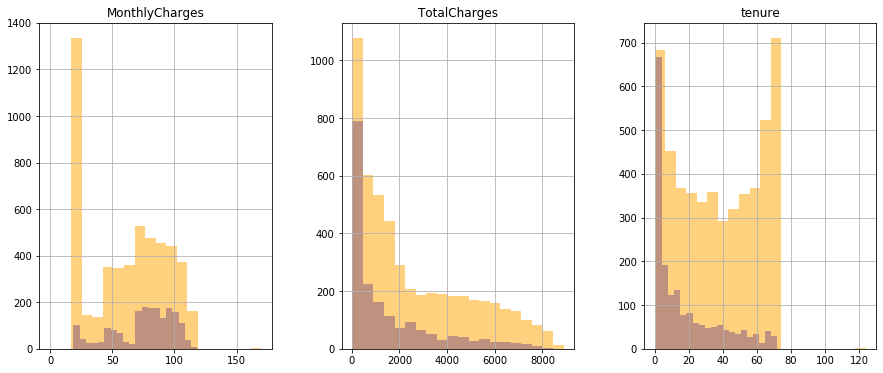

In [ ]:
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig,ax = plt.subplots(1,3, figsize=(15,6))
# Use the following code to plot two overlays of histogram per each numerical_features,
# use a color of blue and orange, respectively

df_load[df_load.Churn == "Yes"][numerical_features].hist(bins=20, color="Blue", alpha=0.5, ax= ax)
df_load[df_load.Churn == "No"][numerical_features].hist(bins=20, color="Orange", alpha=0.5, ax= ax)
plt.show()

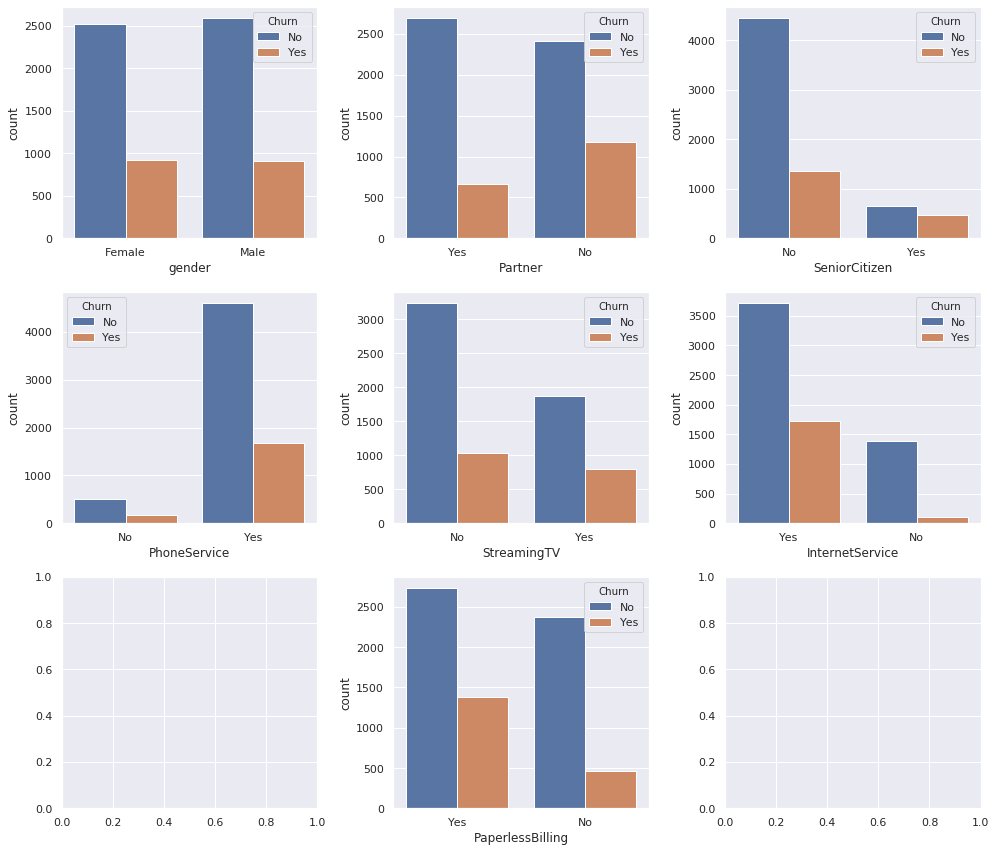

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

sns.countplot(data= df_load, x='gender', hue='Churn', ax=ax[0][0] )
sns.countplot(data= df_load, x='Partner', hue='Churn', ax=ax[0][1] )
sns.countplot(data= df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2] )
sns.countplot(data= df_load, x='PhoneService', hue='Churn', ax=ax[1][0] )
sns.countplot(data= df_load, x='StreamingTV', hue='Churn', ax=ax[1][1] )
sns.countplot(data= df_load, x='InternetService', hue='Churn', ax=ax[1][2] )
sns.countplot(data= df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1] )
plt.tight_layout()


## **Berdasarkan hasil dan analisa di atas dapat disimpulkan:**

1. pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.


2. pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.


3. pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# **Removing Unnecessary Data ; customerID & UpdatedAt**


In [ ]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# **Data Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in  cleaned_df.columns:
  if cleaned_df[column].dtype == np.number: continue
  cleaned_df[column]= LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

## **Data Splitting : Splitting Train & Test Data**


In [ ]:
from  sklearn.model_selection import train_test_split
# predictor  dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

## **Checking the data splitting results**

In [ ]:
# Print according to the expected result
print("Jumlah baris dan kolom  dalam x_train adalah", x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print("Prisentase Churn di Data Training  adalah ", y_train.value_counts(normalize= True))
print("Jumlah baris dan kolom  dalam x_test adalah", x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print("Prisentase Churn di Data TEst  adalah ", y_test.value_counts(normalize= True))



Jumlah baris dan kolom  dalam x_train adalah (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prisentase Churn di Data Training  adalah  0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom  dalam x_test adalah (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prisentase Churn di Data TEst  adalah  0    0.738129
1    0.261871
Name: Churn, dtype: float64


Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

## **Model Building 1 : Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print("Model Logistic Regression yang terbentuk adalah \n", log_model)

Model Logistic Regression yang terbentuk adalah 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/home/tijeee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Model 1 Performance**
### **Classification Report (Train Data)**

In [ ]:
from sklearn.metrics import classification_report
#predict
y_train_pred  = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



## **Confusion Matrix (Train Data)**


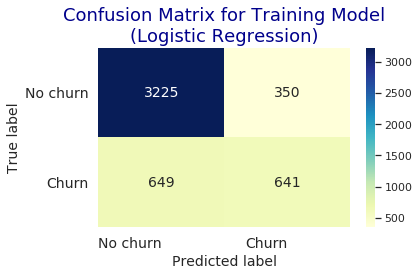

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14b
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[3225,  350],
       [ 649,  641]])

## **Classification Report (Test Data)**

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_tests_pred= log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_tests_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



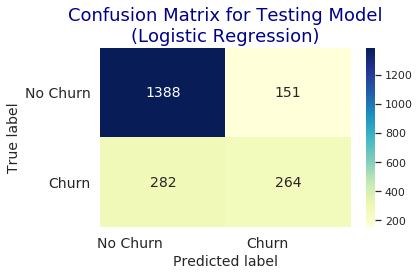

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import  seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_tests_pred), ('No Churn', 'Churn'),('No Churn', 'Churn'))


# Plot confusion matrix
plt.figure()
heatmap= sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari hasil dan analisa di atas, maka:

1. Jika kita menggunakan menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.

2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan churn yang sebenernya benar churn adalah 638, tebakan tidak churn yang sebenernya tidak churn adalah 3237, tebakan tidak churn yang sebenernya benar churn adalah 652 dan tebakan churn yang sebenernya tidak churn adalah 338.

3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 264, tebakan tidak churn yang sebenernya tidak churn adalah 1392, tebakan tidak churn yang sebenernya benar churn adalah 282 dan tebakan churn yang sebenernya tidak churn adalah 146.

# **Model Building 3 : Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#TRAIN MODEL
gbl_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbl_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# **Model 3 Performance**
## **Classification Report (Train Data)**

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_train_pred= gbl_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



## **Confusion Matrix (Train Data)**

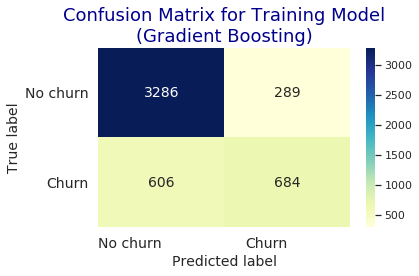

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## **Classification Report (Test Data)**

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = gbl_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



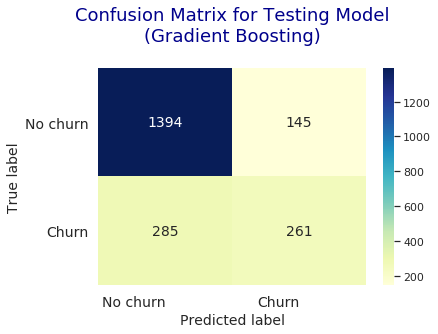

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[1394,  145],
       [ 285,  261]])

Dari hasil dan analisa di atas, maka:

1. Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.


2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.


3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

## **Menentukan Algoritma Model Terbaik**


Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing. Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing. Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing. Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file. Anda bisa gunakan code dibawah ini untuk menyimpan file model untuk di coba di local laptop anda pribadi

## **Karena pada percobaan ini model terbaik adalah model Gradient Boosting dengan tingkat accuracy sebesar 79%, Precision 83%, dan recall 91% pada data test, dan memiliki nilai accuracy sebesar 82% pada data train. karenanya model yang akan disave adalah model tersebut,**

In [ ]:
#save dumple

pickle.dump(gbl_model, open('best_model_churn.pkl','wb'))

In [ ]:
print(gbl_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Extreme Gradient Boosting. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 82%, akurasi testing 79%), dilain sisi algoritma lainnya khususnya pada Random Forest cenderung Over-Fitting performanya. Adapun pada Logistic Regression, sebenarnya juga cukup baik dan hampir sama dengan hasil Extreme Gradient Boosting, akan tetapi nilai accuracy pada data training nya tidak sebaik Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Gradient Boosting, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.